# Rabbits and foxes

There are initially 400 rabbits and 200 foxes on a farm (but it could be two cell types in a 96 well plate or something, if you prefer bio-engineering analogies). Plot the concentration of foxes and rabbits as a function of time for a period of up to 600 days. The predator-prey relationships are given by the following set of coupled ordinary differential equations:

\begin{align}
\frac{dR}{dt} &= k_1 R - k_2 R F \tag{1}\\
\frac{dF}{dt} &= k_3 R F - k_4 F \tag{2}\\
\end{align}

* Constant for growth of rabbits $k_1 = 0.015$ day<sup>-1</sup>
* Constant for death of rabbits being eaten by foxes $k_2 = 0.00004$ day<sup>-1</sup> foxes<sup>-1</sup>
* Constant for growth of foxes after eating rabbits $k_3 = 0.0004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* Constant for death of foxes $k_4 = 0.04$ day<sup>-1</sup>

*This problem is based on one from Chapter 1 of H. Scott Fogler's textbook "Essentials of Chemical Reaction Engineering".*


In [58]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Now let's try some Kinetic Monte Carlo

We wish to implement a Kinetic Monte Carlo algorithm to simulate the same situation. See https://en.wikipedia.org/wiki/Kinetic_Monte_Carlo for details.

We'll assume the numbers of rabbits and foxes (starting at 400 and 200) are actual rabbits and foxes, not "rabbit densities" for example, and so must always remain integers: you can't have half a rabbit or half a fox.

There are four events, with rates that are straightforward to calculate, so the rejection-free algorithm is suitable:
* `rabbit_birth = k1 * rabbits`
* `rabbit_death = k2 * rabbits * foxes`
* `fox_birth = k3 * rabbits * foxes`
* `fox_death = k4 * foxes`


Use a Kinetic Monte Carlo simulation(s) running for 600 days to determine
1. The expected location of the second peak in foxes (eg. 425 days, 2800 foxes), on occasions that there is one (eg. if there's a peak that's  >200 days and >100 foxes)
2. The interquartile range of the second peak in foxes (eg. 411-443 days, 2700-3120 foxes).
3. The probability that the foxes die out before 600 days are complete

Make sure you've done enough simulations to be suitably confident in your answers (given the precision you think appropriate).

# Your turn!

[ 0 ][ 1 ][ 2 ][ 3 ][ 4 ][ 5 ][ 6 ][ 7 ][ 8 ][ 9 ][ 10 ][ 11 ][ 12 ][ 13 ][ 14 ][ 15 ][ 16 ][ 17 ][ 18 ][ 19 ][ 20 ][ 21 ][ 22 ][ 23 ][ 24 ][ 25 ][ 26 ][ 27 ][ 28 ][ 29 ][ 30 ][ 31 ][ 32 ][ 33 ][ 34 ][ 35 ][ 36 ][ 37 ][ 38 ][ 39 ][ 40 ][ 41 ][ 42 ][ 43 ][ 44 ][ 45 ][ 46 ][ 47 ][ 48 ][ 49 ][ 50 ][ 51 ][ 52 ][ 53 ][ 54 ][ 55 ][ 56 ][ 57 ][ 58 ][ 59 ][ 60 ][ 61 ][ 62 ][ 63 ][ 64 ][ 65 ][ 66 ][ 67 ][ 68 ][ 69 ]

KeyboardInterrupt: 

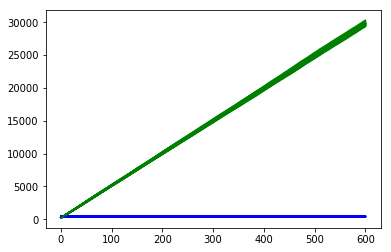

In [117]:
import random
random.seed(1) 
np.random.seed(1)
end_time = 600
def get_rates(rabbit,fox):
    k1 = 0.015
    k2 = 0.00004
    k3 = 0.0004
    k4 = 0.04
    rabbit_birth = k1 * rabbit
    rabbit_death = k2 * rabbit * fox
    fox_birth = k3 * rabbit * fox
    fox_death = k4 * fox    
    return (rabbit_birth, rabbit_death, fox_birth, fox_death)

dead_foxes = 0
extinction = 0
runs = 1000

mean_times = np.zeros(runs)
mean_foxes = np.zeros(runs)
upper_quartile_times = np.zeros(runs)
lower_quartile_times = np.zeros(runs)
upper_quartile_foxes = np.zeros(runs)
lower_quartile_foxes = np.zeros(runs)

second_peak_times = []
second_peak_foxes = []
foxes_died = False
rabbits_died = False
for i in range (runs):
    print('[',i,']',end='')
    time = 0
    rabbit = 400
    fox = 200
    rabbits = []
    foxes = []
    times = []
    state = 0
    while time < end_time:
        times.append(time)
        rabbits.append(rabbit)
        foxes.append(fox)    
        rates = (rabbit_birth, rabbit_death, fox_birth, fox_death)=get_rates(400,200) 
        sum_rates = sum(rates)
        if sum_rates == 0:
            extinction += 1
            times.append(end_time)
            rabbits.append(rabbit)
            foxes.append(fox)
            break
        wait_time = random.expovariate( sum_rates )
        time += wait_time
        state = random.uniform(0, sum_rates)
        state -= fox_birth
        if state < fox_birth:
            fox += 1 
            continue
        state -= fox_death
        if state < fox_death:
            fox -= 1
            if fox == 0:
                foxes_died = True
                break
            continue
        if state < rabbit_birth:
            rabbit += 1
            continue
        rabbit -= 1
        if rabbit == 0:
            rabbits_died = True
        
    times = np.array(times)
    rabbits = np.array(rabbits)
    foxes = np.array(foxes)
    
    index_of_second_peak = np.argmax(foxes*(times>200)*(foxes>100))
    if index_of_second_peak:
        second_peak_times.append(times[index_of_second_peak])
        second_peak_foxes.append(foxes[index_of_second_peak])
    
    if len(second_peak_times)>0:
        mean_times[i] = np.mean(second_peak_times)
        mean_foxes[i] = np.mean(second_peak_foxes)
        upper_quartile_times[i] = np.percentile(second_peak_times,75)
        lower_quartile_times[i] = np.percentile(second_peak_times,25)
        upper_quartile_foxes[i] = np.percentile(second_peak_foxes,75)
        lower_quartile_foxes[i] = np.percentile(second_peak_foxes,25)

    if i < 50:
        plt.plot(times, rabbits, 'b')
        plt.plot(times, foxes, 'g')
plt.legend(['rabbits','foxes'],loc="best") 
plt.ylim(0,3000)
plt.show()


print("Everything died {} times out of {} or {:.1f}%".format(extinction, runs, 100*extinction/runs))
print("Foxes died {} times out of {} or {:.1f}%".format(dead_foxes, runs, 100*dead_foxes/runs))

plt.semilogx(mean_times,'-r')
plt.semilogx(upper_quartile_times,':r')
plt.semilogx(lower_quartile_times,':r')
plt.ylabel('Second peak time (days)')
plt.xlim(10)
plt.show()
print("Second peak (days) is {:.1f} with IQR [{:.1f}-{:.1f}] ".format(mean_times[-1], lower_quartile_times[-1], upper_quartile_times[-1]))


plt.semilogx(mean_foxes,'-k')
plt.semilogx(upper_quartile_foxes,':k')
plt.semilogx(lower_quartile_foxes,':k')
plt.ylabel('Second peak foxes')
plt.xlim(10)
plt.show()
print("Second peak (foxes) is {:.1f} with IQR [{:.1f}-{:.1f}] ".format(mean_foxes[-1], lower_quartile_foxes[-1], upper_quartile_foxes[-1]))


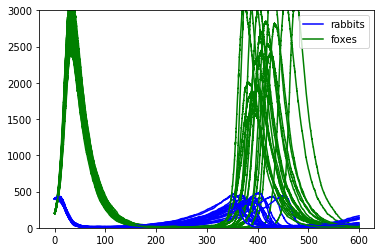

Rabbits died 29 times out of 1000 or 2.9%
Foxes died 684 times out of 1000 or 68.4%
Everything died 23 times out of 1000 or 2.3%


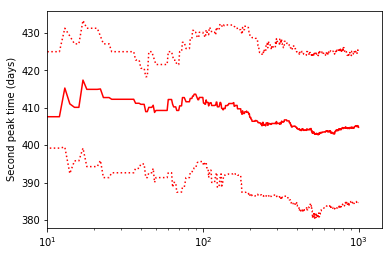

Second peak (days) is 404.8 with IQR [384.7-425.1] 


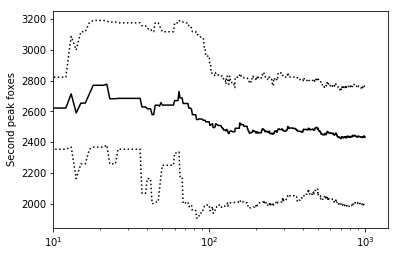

Second peak (foxes) is 2432.4 with IQR [1993.2-2760.5] 


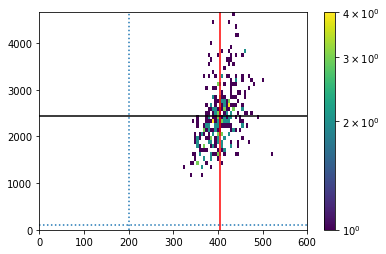

26.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [82]:
%%timeit -n1 -r1
full_analysis(runs=1000)

In [57]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
